# Лабораторная работа № 4.1

### Задача:

Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде
программ, задавая в качестве входных данных шаг сетки h . С использованием
разработанного программного обеспечения решить задачу Коши для ОДУ 2-го
порядка на указанном отрезке. Оценить погрешность численного решения с
использованием метода Рунге – Ромберга и путем сравнения с точным решением.

In [1]:
import math, numpy as np, pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Задача Коши:

$ 
\begin{equation}
 \begin{cases}
   y''+4xy'+(4x^2 + 2)y = 0,
   \\
   y(0) = 1,
   \\
   y'(0) = 1.
 \end{cases}
\end{equation}
$

$ x \in [0; 1]; h = 0.1 $

Перепишем как:

$ 
\begin{equation}
 \begin{cases}
   y' = z,
   \\
   z' = -4xz - (4x^2 + 2)y,
   \\
   y(0) = 1,
   \\
   z(0) = 1.
 \end{cases}
\end{equation}
$

$ x \in [0; 1]; h = 0.1 $

Тогда:

$ f(x, y, z) = z $

$ g(x, y, z) = -4xz - (4x^2 + 2)y $

In [2]:
def F(x, y1, y2):
    return np.array([
        y2,
        -4*x*y2-(4*x**2 + 2)*y1
    ])

In [3]:
def y(x):
    return (1 + x) * np.exp(-x**2)

In [4]:
def EPS(Table, fun, tb2 = None, r = 2, p = 2):
    if tb2 is None:
        x = Table[:, :1].T[0]
        y = Table[:, 1:2].T[0]
        return pd.DataFrame(data={'$$x$$': x, '$$y$$': y, '$$y_{ист}$$' : fun(x), '$$\epsilon$$' : np.abs(y - fun(x))})
    
    x = Table[:, :1].T[0]
    y = Table[:, 1:2].T[0]
    eps = ((tb2[:, 1:2] - Table[:, 1:2]) / (r**p - 1)).T[0]
    
    return pd.DataFrame(data={'$$x$$': x, 
                              '$$y$$': y, 
                              '$$y_{ист}$$' : fun(x), 
                              '$$\epsilon$$' : np.abs(y - fun(x)), 
                              '$$\epsilon_{h}$$' : eps})

#### Метод Эйлера

In [5]:
class EulerMethod:
    
    def __init__(self, X0, Y0, F):
        self.X0 = X0
        self.Y0 = Y0
        self.F = F
        
    def Solve(self, b, h = 0.1, recalc = False):
        
        Table = [(self.X0, self.Y0)]
        
        for x_k in np.arange(self.X0, b, h):
            u_k = Table[-1][1]
            u_kp1 = u_k + h * self.F(x_k, *u_k)
            if recalc:
                u_kp1 = u_k + (h / 2.0) * (self.F(x_k, *u_k) + self.F(x_k, *u_kp1))
            Table.append((x_k + h, u_kp1))
            
        return np.array([(x, Y[0]) for x, Y in Table])

In [6]:
EM = EulerMethod(0, np.array([1, 1]), F)
Table1 = EM.Solve(1, 0.1, True)
Table2 = EM.Solve(1, 0.05, True)

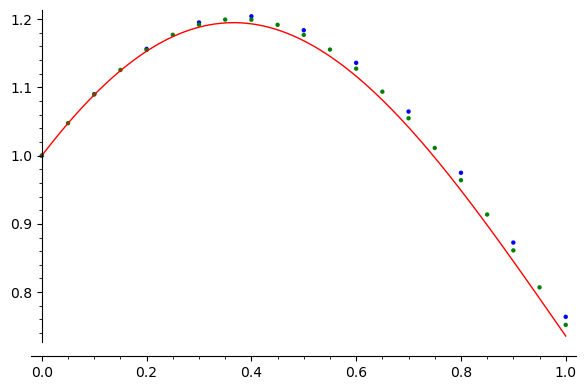

In [7]:
list_plot(Table1) +\
list_plot(Table2, color = 'green') +\
plot(y, (0, 1), color = 'red')

In [8]:
EPS(Table1, y, tb2 = Table2[::2])

,$$x$$,$$y$$,$$y_{ист}$$,$$\epsilon$$,$$\epsilon_{h}$$
0,0.0,1.000000,1.000000,0.000000,0.000000
1,0.1,1.090000,1.089055,0.000945,-0.000160
2,0.2,1.156302,1.152947,0.003355,-0.000534
3,0.3,1.194988,1.188111,0.006877,-0.001057
4,0.4,1.204067,1.193001,0.011066,-0.001660
5,0.5,1.183644,1.168201,0.015443,-0.002270
6,0.6,1.135850,1.116282,0.019568,-0.002826
7,0.7,1.064545,1.041465,0.023080,-0.003286
8,0.8,0.974860,0.949126,0.025734,-0.003625
9,0.9,0.872632,0.845230,0.027401,-0.003833


#### Метод Рунге-Кутта 4-го порядка

In [9]:
class RungeKuttaMethod4:
    
    def __init__(self, X0, Y0, F):
        self.X0 = X0
        self.Y0 = Y0
        self.F = F
        
    def Solve(self, b, h = 0.1):
        
        Table = [(self.X0, self.Y0)]
        
        for x_k in np.arange(self.X0, b, h):
            u_k = Table[-1][1]
            K1 = h * self.F(x_k, *u_k)
            K2 = h * self.F(x_k + .5 * h, *(u_k + .5 * K1))
            K3 = h * self.F(x_k + .5 * h, *(u_k + .5 * K2))
            K4 = h * self.F(x_k + h, *(u_k + K3))
            
            u_kp1 = u_k + (K1 + 2.0 * K2 + 2.0 * K3 + K4) / 6.0
            
            Table.append((x_k + h, u_kp1))
            
        return np.array([(x, Y[0]) for x, Y in Table])

In [10]:
RKM4 = RungeKuttaMethod4(0, np.array([1, 1]), F)
Table1 = RKM4.Solve(1, 0.1)
Table2 = RKM4.Solve(1, 0.05)

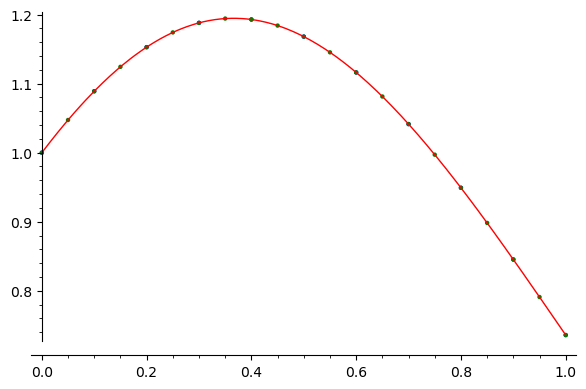

In [11]:
list_plot(Table1) +\
list_plot(Table2, color = 'green') +\
plot(y, (0, 1), color = 'red')

In [12]:
EPS(Table1, y, tb2 = Table2[::2], p = 4)

,$$x$$,$$y$$,$$y_{ист}$$,$$\epsilon$$,$$\epsilon_{h}$$
0,0.0,1.000000,1.000000,0.000000e+00,0.000000e+00
1,0.1,1.089053,1.089055,1.558791e-06,9.769148e-08
2,0.2,1.152945,1.152947,2.487352e-06,1.559833e-07
3,0.3,1.188108,1.188111,2.643280e-06,1.658418e-07
4,0.4,1.192999,1.193001,2.151386e-06,1.349616e-07
5,0.5,1.168200,1.168201,1.380345e-06,8.636430e-08
6,0.6,1.116281,1.116282,8.433666e-07,5.222247e-08
7,0.7,1.041464,1.041465,1.051756e-06,6.469883e-08
8,0.8,0.949124,0.949126,2.364918e-06,1.465224e-07
9,0.9,0.845225,0.845230,4.880852e-06,3.040691e-07


#### Метод Адамса 4-го порядка

In [13]:
class LMMethod:
    
    def __init__(self, X0, Y0, F):
        self.X0 = X0
        self.Y0 = Y0
        self.F = F
        
    def Solve(self, b, h = 0.1):
        
        Table = [(self.X0, self.Y0)]
        
        for x_k in np.arange(self.X0, b, h):
            if len(Table) < 4:
                u_k = Table[-1][1]
                K1 = h * self.F(x_k, *u_k)
                K2 = h * self.F(x_k + .5 * h, *(u_k + .5 * K1))
                K3 = h * self.F(x_k + .5 * h, *(u_k + .5 * K2))
                K4 = h * self.F(x_k + h, *(u_k + K3))

                u_kp1 = u_k + (K1 + 2.0 * K2 + 2.0 * K3 + K4) / 6.0
            else:
                f_km3 = self.F(x_k - 3 * h, *Table[-4][1])
                f_km2 = self.F(x_k - 2 * h, *Table[-3][1])
                f_km1 = self.F(x_k - h, *Table[-2][1])
                f_k = self.F(x_k, *Table[-1][1])
                u_k = Table[-1][1]
                
                u_kp1 = u_k + (h / 24.0) * (55 * f_k - 59 * f_km1 + 37 * f_km2 - 9 * f_km3)
                
            Table.append((x_k + h, u_kp1))
            
        return np.array([(x, Y[0]) for x, Y in Table])

In [14]:
LMM = LMMethod(0, np.array([1, 1]), F)
Table1 = LMM.Solve(1, 0.1)
Table2 = LMM.Solve(1, 0.05)

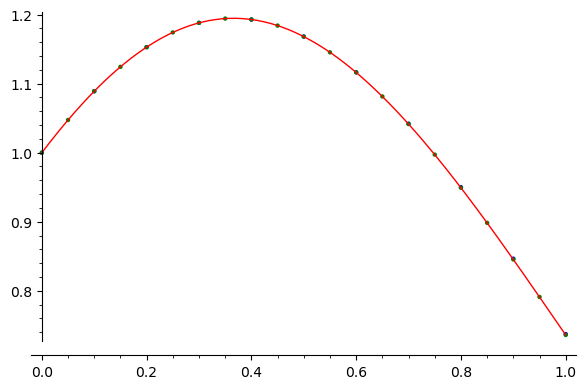

In [15]:
list_plot(Table1) +\
list_plot(Table2, color='green') +\
plot(y, (0, 1), color = 'red')

In [16]:
EPS(Table1, y, tb2 = Table2[::2], p = 4)

,$$x$$,$$y$$,$$y_{ист}$$,$$\epsilon$$,$$\epsilon_{h}$$
0,0.0,1.000000,1.000000,0.000000,0.000000e+00
1,0.1,1.089053,1.089055,0.000002,9.769148e-08
2,0.2,1.152945,1.152947,0.000002,-1.649759e-07
3,0.3,1.188108,1.188111,0.000003,-2.464714e-07
4,0.4,1.192918,1.193001,0.000083,5.643946e-06
5,0.5,1.168304,1.168201,0.000103,-5.678113e-06
6,0.6,1.116589,1.116282,0.000307,-1.780182e-05
7,0.7,1.042087,1.041465,0.000622,-3.724690e-05
8,0.8,0.950087,0.949126,0.000960,-5.843778e-05
9,0.9,0.846453,0.845230,0.001223,-7.499876e-05
